# Auto Scout ML Project
## Determines

- **Auto Scout** data was taken from the online automobile trading company [AutoScout24](https://www.autoscout24.com) in 2019 and includes many features of 9 different car models.

- In this project, we will use the already pre-processed and prepared data set for the algorithms.

- The goal of this project is to understand machine learning algorithms. Therefore, we will not need an intensive EDA process since you will be working on edited data.

- In this scenario, we will predict car prices using regression algorithms.

- When we get started, we will need to import the necessary libraries. We will also need to do some pre-processing before moving on to modelling.

- Then we will apply Linear Regression, Ridge Regression, Lasso Regression and Elastic-Net algorithms respectively.

- We can measure the success of our models with regression error metrics and cross validation method.

- For better results, we will try to increase the success of your models by tuning hyperparameters.

- We will determine the importance of features for the model and adjust our model with the most important features to save resources.

- Finally, we will compare the performances of the algorithms.

- You can also work more on the algorithm with the most successful prediction rate.


**------------**

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance

- 11. Prediction

# Import Modules, Load Data and Data Review

In [5]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: unlimited, default:20
pd.set_option('display.max_rows', 500)    # None: unlimited, default:10
pd.options.display.float_format = '{:.3f}'.format

# EDA

In [6]:
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

In [7]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [9]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
336,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
337,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
339,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
340,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
341,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,Renault Espace,Van,50950,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1647.000,front,7.600
15820,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15823,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15808,Renault Espace,Van,54982,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1647.000,front,7.600


In [10]:
# Check for duplicate observations in the dataset and removes them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [11]:
duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [12]:
df.describe().T

# we know the data

# If std is a value greater than or close to the mean, it gives us an inference that there is an outler problem in our entire data.

# If there is a gap between the "min" and the first quarter of 25% and/or between the third quarter and the max of 75%, our data in general
# provides an inference that there may be a limited number of outlier values even if not

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [13]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## Feature Engineering

In [14]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control ?

In [15]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())
    
#With <20, 20-character space is left from the left to the ":" sign, and feature names are written in this space.
# The ":" sign is aligned on all lines.

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [16]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

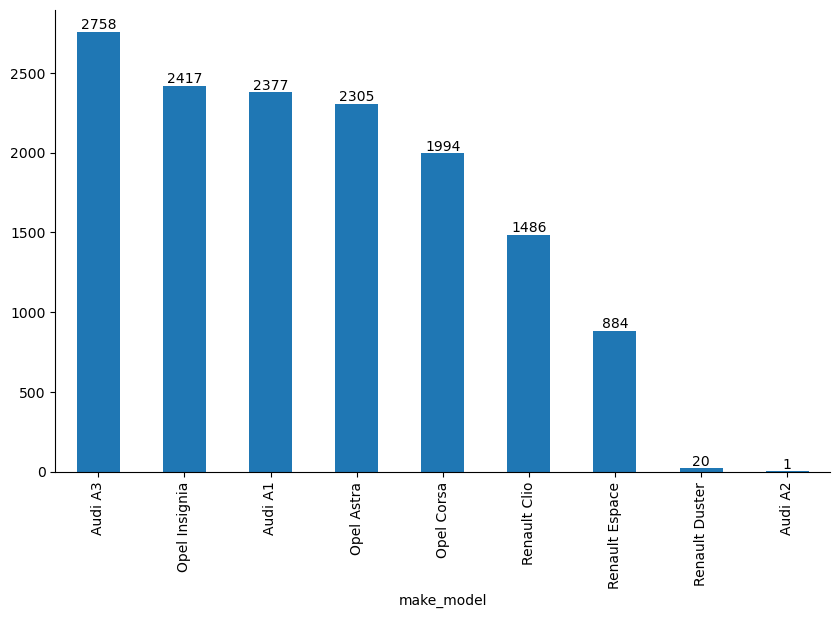

In [17]:
# This code calculates the number of unique values in the "make model" column in our DataFrame
# and visualizes these numbers in a bar chart.

ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
    
ax.bar_label(ax.containers[0]);

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [18]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [19]:
df.drop(index=[2614], inplace =True)

In [20]:
df.shape

(14241, 23)

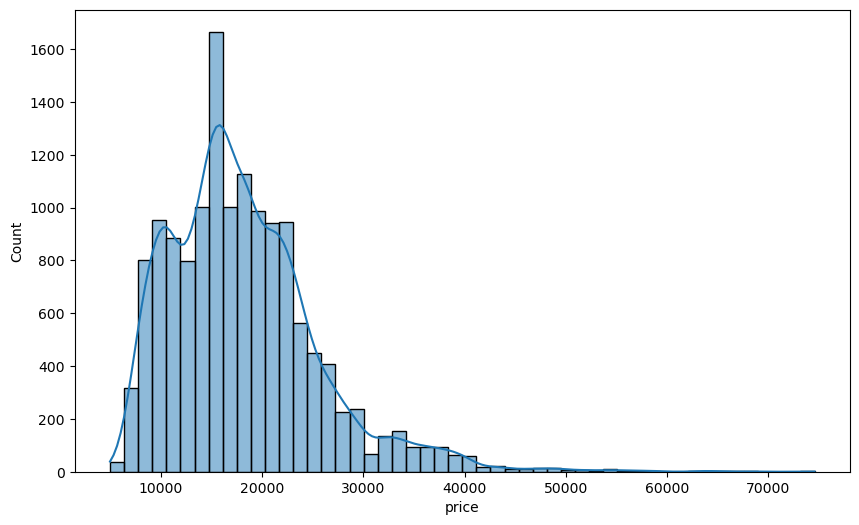

In [21]:
# Since linear models are very sensitive to outliers, I try to detect outliers in the data with histplot.
# Outlier for ML means that the data belonging to a group or groups in our data is insufficient for training.
# do not forget. Looking at the image below, we see that the number of vehicles over 40,000 EURO is very small. This image
# As a first insght, the number of vehicles over 40 thousand EURO may be insufficient for training.
# we can evaluate. However, we cannot understand whether it is inadequate or not without doing the training. Both as outlier
# We must decide by dropping the observations we evaluated and doing the training without dropping them and comparing the scores.

# Additionally, looking at the histplot for the entire data may mislead us regarding the outlier. In our data for outlier detection
# We should group the data (Audi A3, Audi A1, Renault Cilo, etc.) and determine the outlier accordingly.

sns.histplot(df.price, bins=50, kde=True);

**Linear models** are sensitive to outliers because these models attempt to find a line (or, in higher dimensional spaces, a plane or hyperplane) that best fits the data points. Outliers can greatly impact this “best fit” goal of the model. Here are some reasons why:

1. **MSE Based Loss Functions**: Many linear models, such as linear regression, use a mean square error (MSE) based loss function. MSE makes these errors larger by squaring large errors, so even a single outlier can greatly increase the total error.

2. **Low Dominance**: In linear models, each data point contributes to training the model. However, an outlier value can have a much larger impact than any other value. This may cause the model to overfit this outlier.

3. **Linear Assumption**: Linear models assume that the relationship between data is linear. This can cause the model to be particularly sensitive to outliers, as these outliers often disrupt the assumed linear relationship.

4. **Leverage Effect**: Outliers can greatly change the trend (or slope) of a linear model, causing predictions for all other data points to be misleading.

In many applications, this sensitivity of linear models to outliers can reduce the generalization ability and reliability of the model. Therefore, it is often recommended to detect outliers and handle them appropriately before performing linear modelling.

Many statistical and machine learning models are sensitive to outliers. However, this sensitivity may vary depending on the characteristics of the model and the optimization techniques used.

**Models Sensitive to Outliers:**

1. **Linear Regression**: As we mentioned before, linear regression is sensitive to outliers.
2. **Logistic Regression**: Logistic regression is a type of linear regression and can be sensitive to outliers for similar reasons.
3. **K-Nearest Neighbor (KNN)**: The KNN algorithm may be affected by outliers when the k value is small.
4. **Univariate Time Series Models**: Models like ARIMA can be sensitive to outliers.

**Models Not Sensitive to Outliers:**

1. **Decision Tree & Random Forest**: These models are generally resistant to outliers because they work by splitting data points.
2. **Support Vector Machines (SVM) with RBF Kernel**: SVM with RBF kernel can be robust against outliers.
3. **Ensemble Methods**: Ensemble methods such as Boosting and Bagging generally become more robust to outliers by combining multiple models.

**Summary**

A model's sensitivity to outliers depends on the structural properties of that model and the optimization techniques it uses. Linear models are often sensitive to outliers because these models look for linear relationships between data points and loss functions such as MSE magnify large errors. Some models (e.g., decision trees, robust regression) are more robust to outliers and are less affected by the impact of such data. Therefore, the characteristics of the data set and the presence of outliers should be taken into account when choosing a model.

In [22]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

# With the select_dtypes(exclude ="number") code, we can filter only the object features in the df.

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
15907,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
15908,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
15909,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


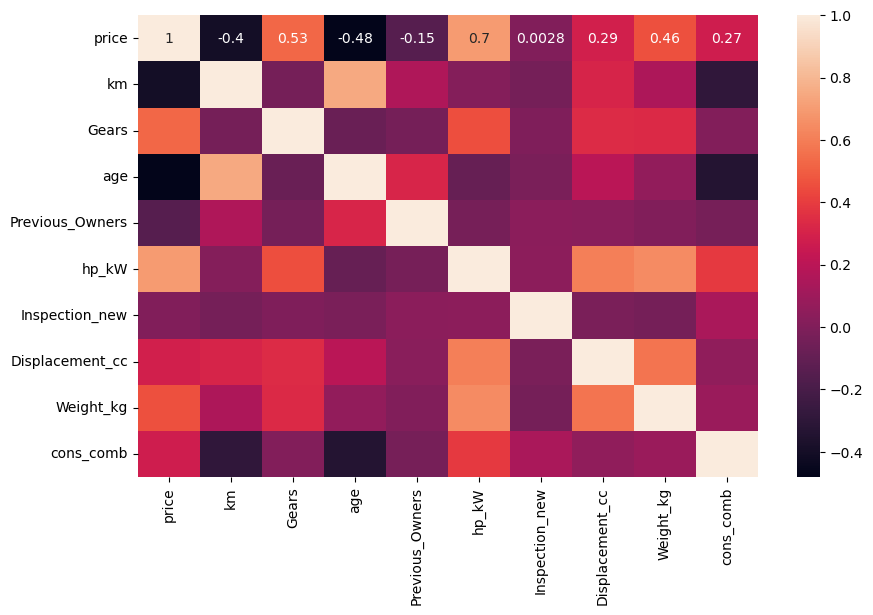

In [23]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

- Multicollinearity problem linear and logisitc reg. This occurs as a problem in gradient descent based models such as

- Multicollinearity occurs when there is a high correlation between independent variables. This means that when one independent variable is strongly related to other independent variables, it can reduce the importance of the other independent variables in the model.

- The problem of multicollinearity can make it difficult to interpret the model correctly. Model coefficients are difficult to estimate accurately and may lead to misinterpretation of the effect of some variables. Therefore, to obtain accurate results, the problem of multicollinearity must be eliminated.

- Regulirazition algorithms solve the overfiting problem as well as the Multicollinearity problem.

Multicollinearity describes the existence of a highly linear relationship between independent variables. While multicollinearity may be a problem for some statistical models, it may not be so critical for others.

**Multicollinearity Sensitive Models:**

1. **Linear Regression**: Linear regression model can be seriously affected when there is high correlation (multicollinearity) between independent variables. This can cause estimates of regression coefficients to be unstable and results to be misleading because the model has difficulty separating the effects of independent variables from each other.

2. **Logistic Regression**: Logistic regression can similarly be affected by multicollinearity because it is also a type of linear model and high correlation between independent variables can reduce the reliability of parameter estimates.

3. **Ridge and Lasso Regression**: Ridge and Lasso regressions are regularization techniques that provide robustness against the multicollinearity problem. However, the effectiveness of these techniques depends on the correct choice of lambda (regularization parameter) value. The choice of lambda has a significant impact on the performance of the model, and this choice is usually made through cross-validation.

**Models Not Sensitive to Multicollinearity:**

1. **Decision Trees**: Decision trees and models based on decision trees (for example, Random Forest) are not affected by the relationships between independent variables because these models work based on splitting criteria and evaluate each independent variable separately.

2. **Support Vector Machines (SVM)**: SVM is not affected by high correlation between independent variables, especially when the right kernel function is chosen. The model is capable of separating data points with an optimal hyperplane, and in this process the correlation between variables does not pose a significant problem.

3. **Naive Bayes**: Naive Bayes classifier does not rely on relationships between variables and works under the assumption of independence, so it is not affected by multicollinearity.

**Why Is Multicollinearity a Problem?**

- **Interpretability of Coefficients**: In the presence of multicollinearity, the high degree of correlation of independent variables with each other makes it difficult to correctly interpret the effect of these variables on the model.
  
- **Instability of Predictions**: Small data changes can cause large fluctuations in model coefficients, which reduces the model's prediction reliability.
  
- **Unreliability of Test Statistics**: Multicollinearity can make the results of statistical tests misleading, for example, p-values and R-squared values are misleading.

- Methods such as variable selection, regularization techniques or principal components regression can be used to deal with multicollinearity.

- These methods can help reduce the negative effects of multicollinearity by increasing the prediction reliability of the model and improving the interpretability of the coefficients.

In [24]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# corr between +0.9 and +1. We can check multicollinearity for values with this code.

False

In [25]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# corr between -0.9 and -1. We can check multicollinearity for values with this code.

False

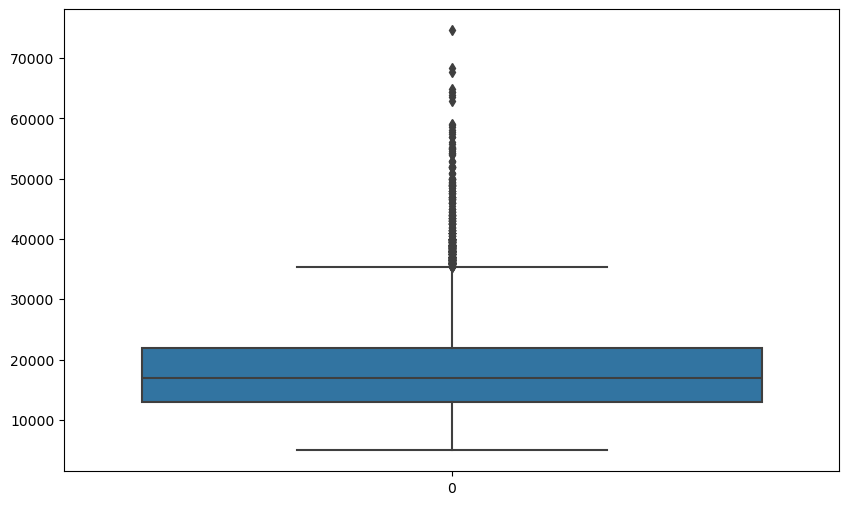

In [26]:
sns.boxplot(df.price);

# We can also obtain insights about outliers via Boxplot. However, these insights may mislead us.
# That's why we make our evaluation not for the data in general, but for the data in general.
# we will do it according to the groups in the data (Audi A1, Audi A3, Renault clio etc.).

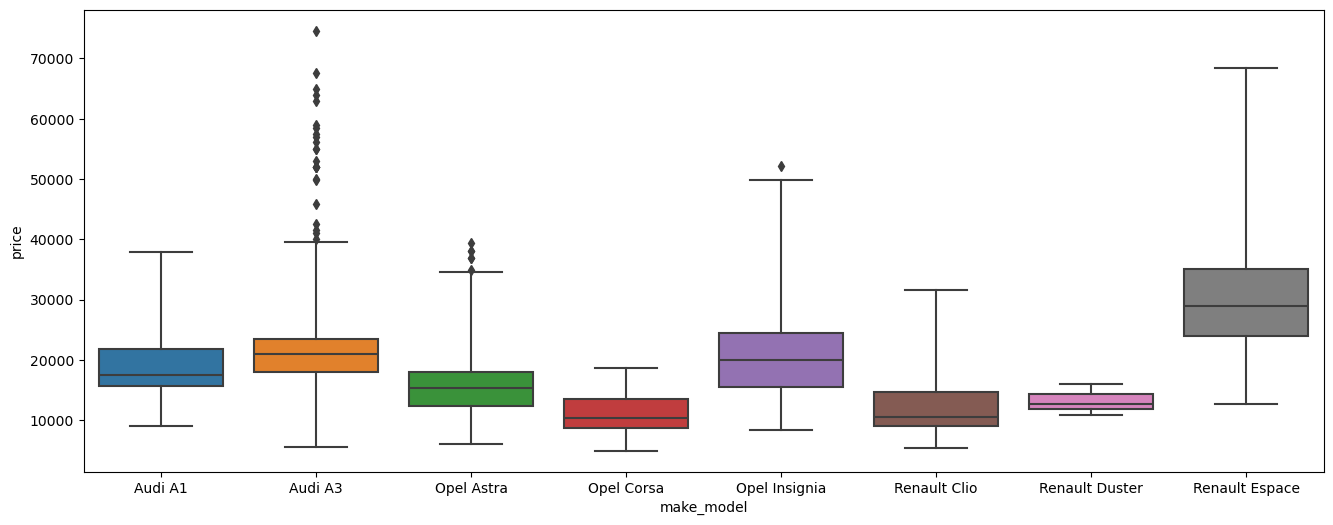

In [27]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

# When we look at the images below, according to the boxplot, there are 3 wiskers for Audi A3, Opel Astra, Opel insignia, Renault clio.
# We can see observations that may be outliers based on 
# In your own data you can determine separate wisker values for each group based on these images.

# To calculate IQR, follow these steps:

# Data is sorted from smallest to largest.
# The first and third quartiles representing 25% and 75% of the data are calculated.
#IQR is obtained by subtracting the first quartile from the third quartile.

# Q1 = df.groupby('make_model')['price'].quantile(0.25)
# Q3 = df.groupby('make_model')['price'].quantile(0.75)
#IQR=Q3-Q1
# lower_lim = Q1-1.5*IQR
# upper_lim = Q3+1.5*IQR

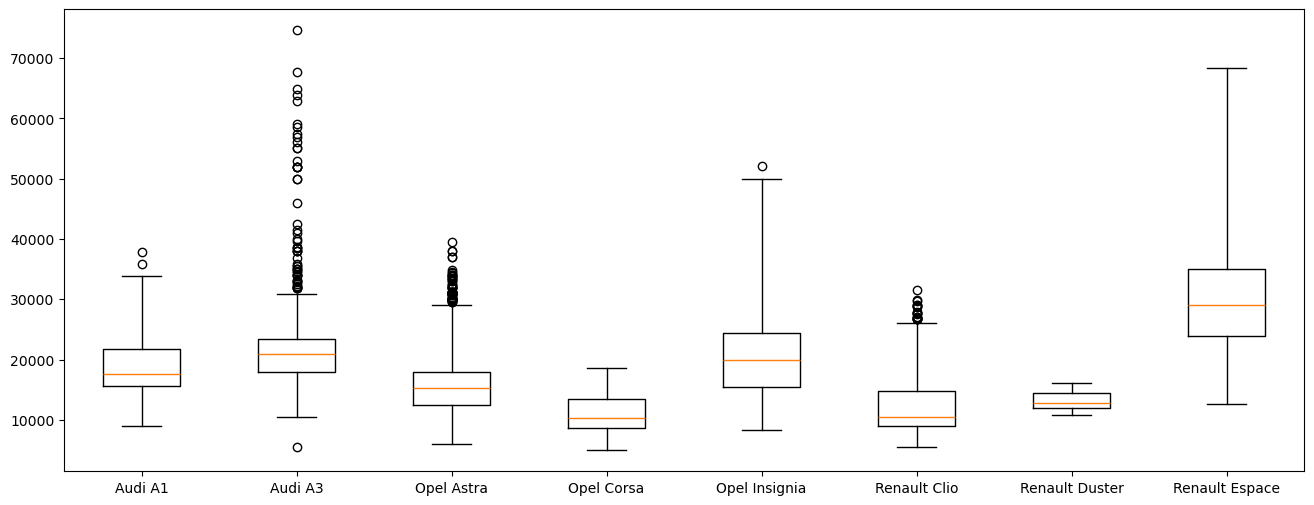

In [28]:
# Seaborn's boxplot function uses the same 'whis' value for all categories, so
# we will use matplotlib's boxplot function to plot each category separately.

whisker_values = {
    'Audi A1': 2.0,
    'Audi A3': 1.5,
    'Opel Astra': 2.0,
    'Opel Corsa': 2.5,
    'Opel Insignia': 3.0,
    'Renault Clio': 2.0,
    'Renault Duster': 1.5,
    'Renault Espace': 3.0
}

plt.figure(figsize=(16,6))

for i, make_model in enumerate(whisker_values.keys()):
    model_data = df[df['make_model'] == make_model]['price']
    plt.boxplot(model_data, positions=[i], whis=whisker_values[make_model], widths=0.5)
    
plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()

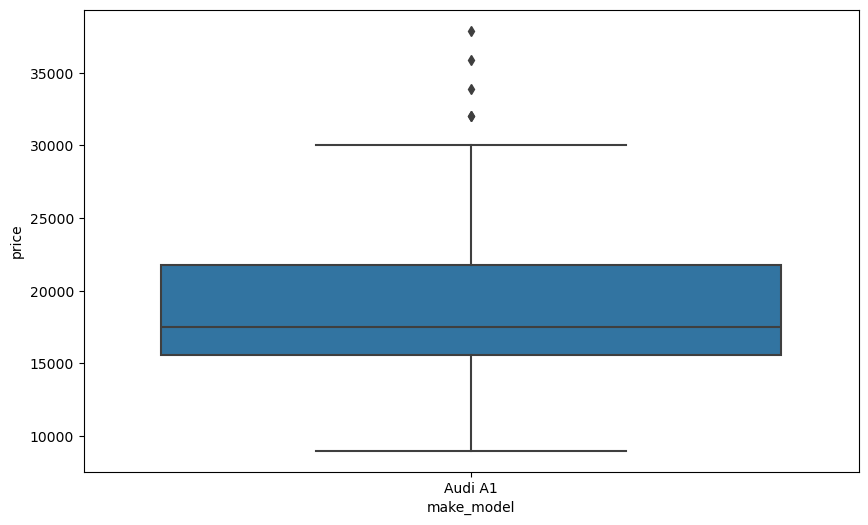

In [29]:
sns.boxplot(x="make_model", y="price", data=df[df["make_model"]== "Audi A1"], whis=1.5)
plt.show()

In [30]:
df[df["make_model"]== "Audi A1"]["price"]

# Audi A1'lerin fiyatları. Bu kodu kullanarak her bir araba için outlier değerleri tespit etmeye çalışacağız.

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2377, dtype: int64

In [31]:
# According to the Wisker value of 1.5, we identify observations that we consider to be outliers for each group.

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


## Get dummies 

**get_dummies()** yöntemi, kategorik sütunları ikili kodlama yaparak yeni sütunlara dönüştürür.

Her bir kategori, bir özellik olarak kodlanır ve özellik varsa 1, yoksa 0 olarak kodlanır.

In [32]:
# This code parses the comma separated text in each cell in our columns,
# creates a new data frame in which each element of these texts is represented as a separate column.

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [33]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [34]:
df = pd.get_dummies(df, drop_first =True)

# drop_first=True parameter removes the column belonging to the first category of each attribute.
# This is done to avoid overfitting and multicollinarity.

# For example, if the column "Fuel_Type" has three categories such as "Diesel", "Gasoline" and "LPG", only two of the columns
# (e.g. "Gasoline" and "LPG") is encoded and used as a reference for the "Diesel" category.
# In this way, the "Gasoline" column and the "LPG" column are associated with the "Diesel" column and any multilinear
# independence problem is prevented.
# Due to Pandas version differences, it may be displayed as 0/1 instead of True/False

In [35]:
# Converts boolean values in DataFrame to integer

bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [36]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [37]:
df.shape

(14241, 133)

In [38]:
df.isnull().any().any()

False

In [39]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

# we look at the corr. of all featurs in our data with the target
# We list our target price and its corr. from smallest to largest.
# Since we do not want to see the corr. of the target with itself, we perform slice ([:-1]) and ignore the target with -1.

age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


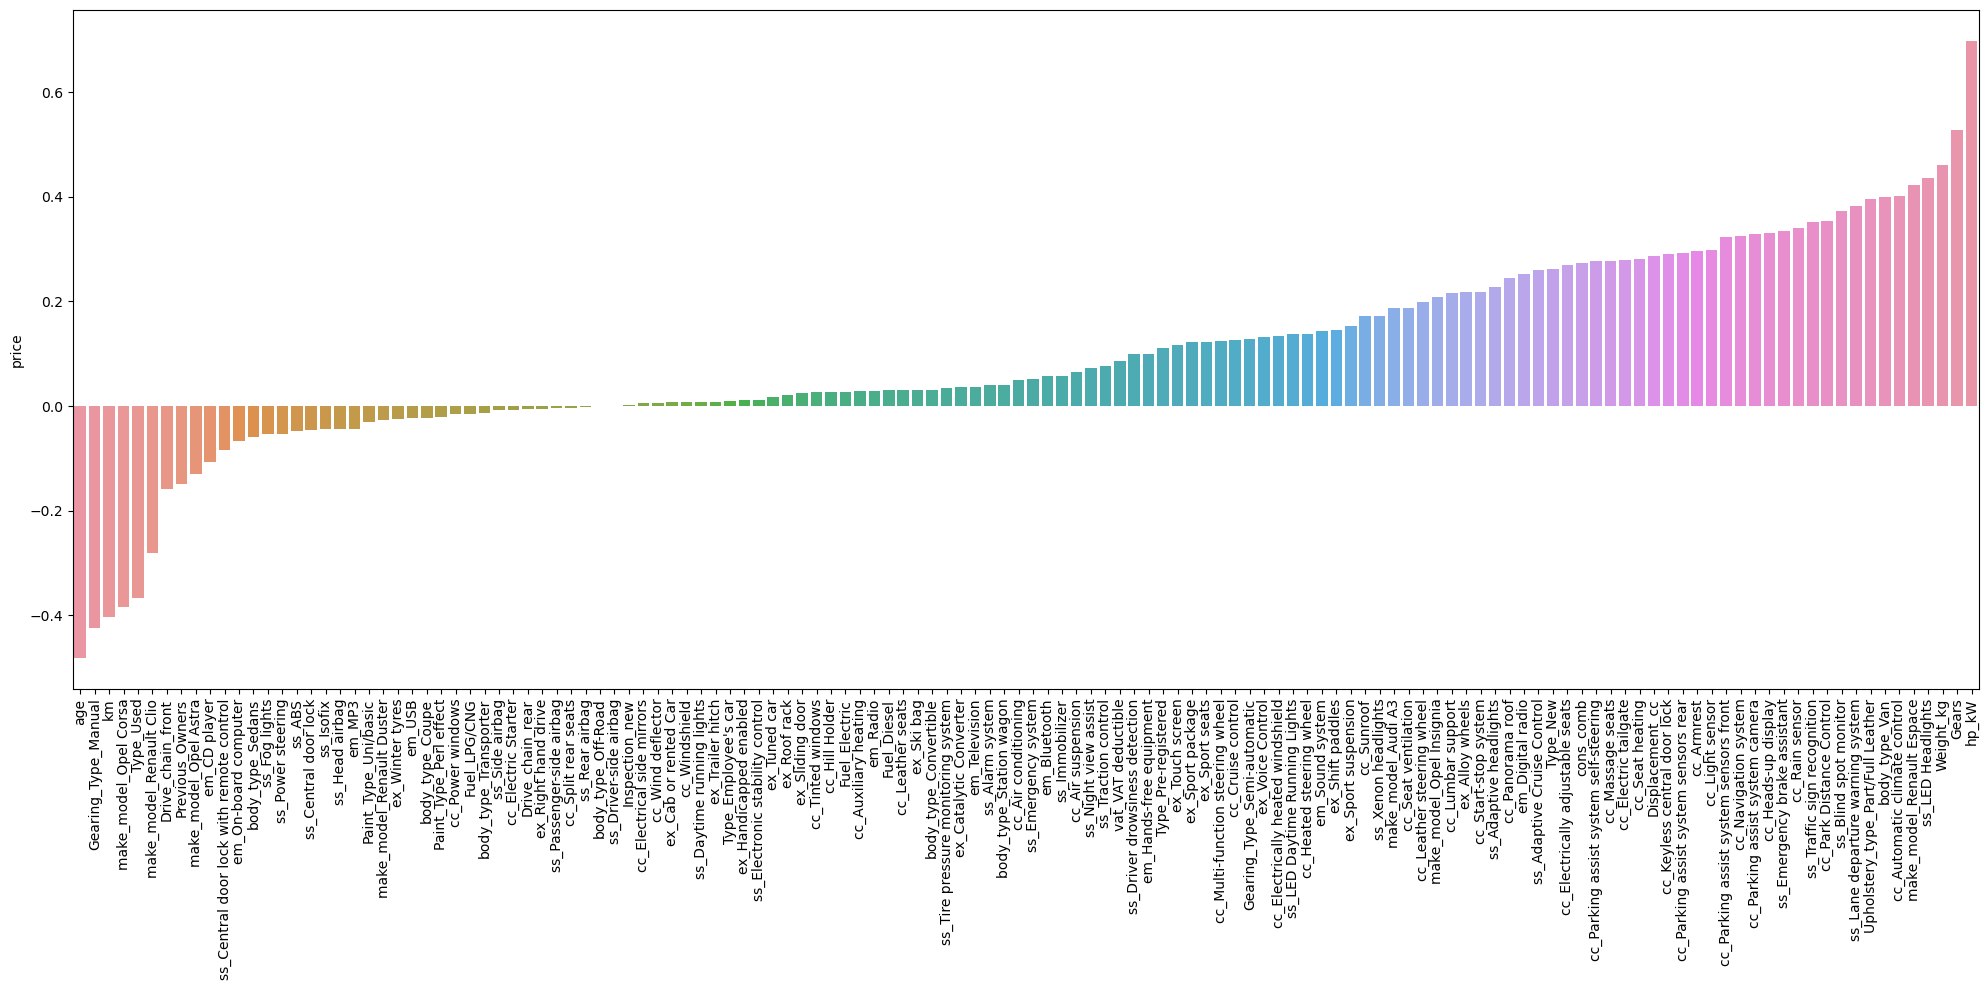

In [40]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# We visualize the corr. between features and target.

# Train | Test Split

**random_state=42**

**test size = 0.2**

**Data Preparation and Model Training**

1. **Editing the Dataset**:
    - Before starting to train the model, it is necessary to edit the dataset. This may include steps such as data cleaning, feature engineering, and handling of outliers.

2. **Separation into Training and Test Sets**:
    - The data set is usually divided into training and test sets. The training set is used to learn the model, while the testing set is used to evaluate the performance of the model.

3. **Separation of Target Variable**:
    - The target variable (label) you are trying to predict must be separated from the features. The model will attempt to predict this target variable.

**Performance evaluation**

1. **Performance Metrics**:
    - Various performance metrics can be used for regression models, for example, Mean Absolute Error (MAE), Mean Squared Error (MSE), R square score, etc.

2. **Function Definition**:
    - By defining a function that calculates different performance metrics of the model, you can easily evaluate and compare these metrics.

3. **Using Cross Validation**:
    - Cross validation is used to evaluate the performance of the model on different data samples. The model is trained on different subsets of the training set and the performance of each subset is evaluated. The average of these scores gives the overall performance of the model.

**Summary**

Data preparation process, separation of training and test sets, determination of the target variable and model training are the basic steps of machine learning projects. Various metrics and cross validation method are used to evaluate the performance of the model. These approaches help you more accurately evaluate the model's generalization ability.

In [41]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [42]:
X= df.drop(columns="price")
y= df.price

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To train the model and then get predictions, we split the data into train and test sets with the train_test_split function.
# By default test_size=0.25.
# Best practice Values around 0.2, 0.25, 0.3 are preferred. The purpose here is to connect to the train set.
# to provide as much data as possible. Especially for small data, this ratio can be chosen around 0.1, 0.15.

# With random_state, we distribute the data randomly to train and test and
# we send the same data to train and test each time

In [44]:
X_train.shape

(11392, 132)

In [45]:
X_test.shape

(2849, 132)

# Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

**Linear Regression**

It predicts the dependent variable through independent variables.

If there is only one independent variable, it is called simple regression; if there is more than one independent variable, it is called multiple linear regression.

If there is a significant relationship between feature and target in simple linear regression, this data is suitable for linear regression.


**Basic assumptions of linear regression analysis**

1. **Linear Relationship Assumption:** It is assumed that the relationship between the dependent variable and the independent variables can be expressed in a linear way. That is, the relationship between the regression line and the variables should be linear. For example, as X increases, Y should also increase or decrease.

2. **Independence Assumption:** Independence is assumed between observations. That is, the result of one observation should not affect other observations.

3. **Normal Distribution Assumption:** Error terms (residuals) should be normally distributed and should not form any pattern. This is necessary for the regression model's predictions to be reliable.

4. **Independence of Independent Variables:** There should be no multicollinearity problem between independent variables. That is, the independent variables should not be too close to each other and should not be highly correlated.

- Yhat = b0 + b1X

- Yhat = estimated value

- b0= intercept (the point where the line intersects the y axis)

- b1= slope = coefficient = weight

- X=independent variable

- Residual = Random error = e= Y-Yhat

**The important thing is to minimize the error.**

**Best fit line**; It draws our mistakes in a way that minimizes them. When there is a single feature, it is found with the **Ordinary Least Squares** method, and when there is more than one, it is found with **gradient descent**.

**Cost - loss function**; It finds the average error by squaring the difference between the actual value and the predicted values.

With the **gradient descent** optimization algorithm, what you will do is to reduce the cost - loss function by gradually changing the w and b values and try to bring it to its minimum value.

It is an algorithm that tries to minimize the error iteratively.

**Bias** is the systematic error in a model's predictions. The further a model's predictions are from the true values, the higher the bias. High bias can occur because the model is simple and cannot fully capture the complexity of the data. Due to underfitting

**Variance** refers to how variable the model's predictions are on different data points.
When trained multiple times on the same dataset, different results are obtained.
It occurs as a result of overfitting.
A high variance indicates that the model overfits the data and the patterns it learns may not generalize to new data outside the data set.

**bias-variance trade-off**:
It is important to strike a balance between bias and variance. Ideally, a model should have both low bias and low variance. This means that the model can accurately capture the complexity of the data and generalize.

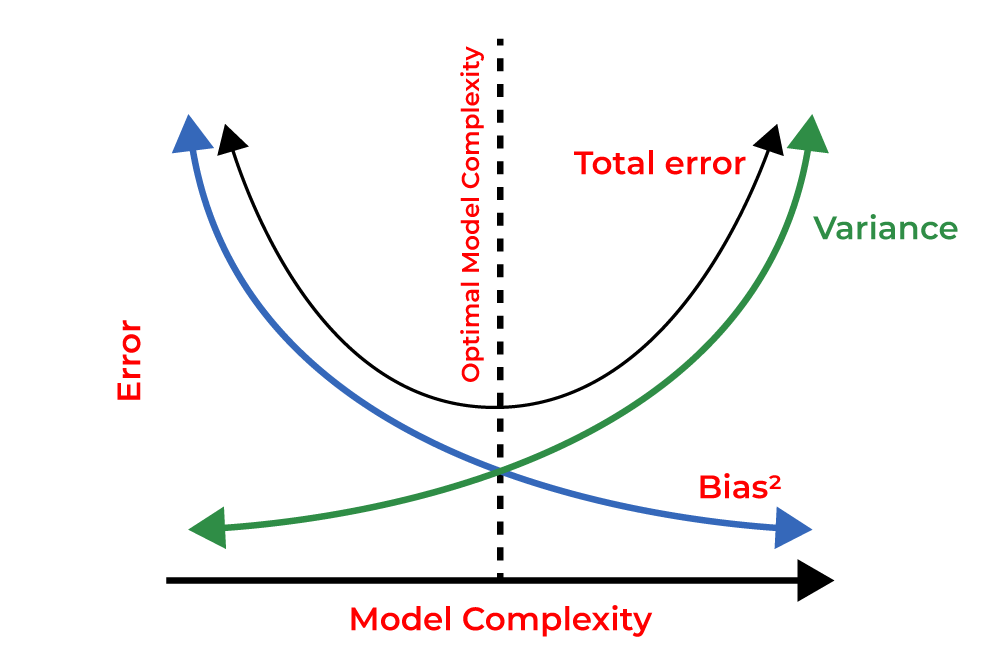

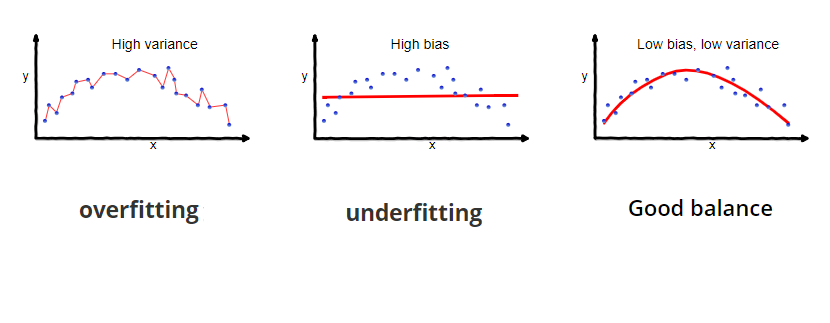

## Model

In [46]:
# We define our function to compare the metrics of the train and test set.

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [47]:
from sklearn.linear_model import LinearRegression # LinearRegression algorithm imported

In [48]:
lm = LinearRegression() # object definition

# We always assign our algorithm to a variable. Otherwise, we will get an error when making a prediction.

In [49]:
lm.fit(X_train,y_train) # train the model according to linear regression by giving the data

# If we write LinearRegression() instead of lm here, the code will also work. But when taking the following prediction LinearRegression()
# If you use, you will get an error. To avoid this error, be sure to assign model =LinearRegression() we do.

LinearRegression()

In [50]:
train_val(lm, X_train, y_train, X_test, y_test)

# first we get our metrics from the test set.
# Then, we take our metrics from the train set and train with the scores the model receives from data it has never seen.
# We compare the scores obtained from the data. If the scores are close to each other, it means that the model can generalize.
# However, if there are serious differences between the scores, the model cannot generalize.

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


## Adjusted R2 Score

**Rsquare - Rsquare, R2 (The Coefficient of Determination)**
It answers the questions "Can I explain the target?" or "How much information do I have to predict the target correctly?"

It takes values between 0-1. The closer it gets to 1, the higher the success rate.

A negative R2 score indicates that the model is misleading the data rather than explaining it, and is an indication that the model is performing poorly. In this case, the data may need to be remodeled with a different model or using a different set of data properties.

**R-squared** = 1 - (SSR / SST)

**SSR (Residual Sum of Squares) - Sum of Squares of Reiduals**:
SSR is the sum of squares of the differences between actual values and predicted values. y - sum of squares of yhat

This expression represents the sum of the squares of the difference between the true value and the model's prediction for each observation.

**SST (Total Sum of Squares)**:
SST refers to the sum of the squares of the differences between the mean of the actual values and the actual values. y - ymean(mean of actual values)

This shows the overall variability of the data.

- SSR expresses how "wrong" your model is. A low SSR value means your model makes predictions close to the true values.

- SST shows the total variability contained in your data. This can be thought of as the "maximum variability" your model should predict.

**R² score (R squared)** is a metric that measures how well the regression model performs. However, in some cases it can be misleading and therefore it may be necessary to look at the **Adjusted R² (Adjusted R square)** value. Here are the reasons:

**Limitations of the R² Score**

1. **Model Complexity**: R² score tends to increase with each new feature added to the model. So, the more features you add to your model, the higher the R² value will generally be. This can lead to the illusion that the model is performing better than it actually is.

2. **Number of Features**: R² does not take into account the number of features in the model. This means that models containing a large number of features may be overfitting the data rather than capturing the relationship that actually exists.

**Advantages of Adjusted R²**

1. **Considers Number of Features**: Adjusted R² tries to compensate for this effect by taking into account the number of features in the model. As you add more features to your model, the Adjusted R² value increases only if this new feature actually improves the model's performance.

2. **More Reliable Model Evaluation**: Adjusted R² is used to evaluate the performance of the model more accurately, especially in models containing more than one feature.

**Summary**

The R² score may increase with each new feature added to the model, which can sometimes be misleading. Adjusted R² reduces this bias by taking into account the features in the model and often provides a more reliable measure of performance for models containing more than one feature. Therefore, it is important to look at Adjusted R² to get a more accurate understanding of the model's true performance.

In [51]:
def adj_r2(y_test, y_pred, df):
     r2 = r2_score(y_test, y_pred) # Calculates the R2 value of the model
     n = df.shape[0] # Gets the number of observations (samples) in the data set
     p = df.shape[1]-1 # Gets the number of arguments (features)
     adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1) # Calculates the value using the formula Adjusted R2
     return adj_r2

In [52]:
y_pred = lm.predict(X_test)

# We take our predictions (y_pred) from the model to use in the function we defined above.

In [53]:
adj_r2(y_test, y_pred, df)

# we obtain our score by giving the necessary parameters to the function.

0.8828492602064283

## Cross Validate

**Overfitting Control and Cross Validation**

1. **Overfitting Control**:
    - Overfitting is when a machine learning model overfits training data and performs poorly on new, unseen data.
    - Overfitting control is done by comparing the scores on the training set and the validation set. If the scores on the training set are much higher than on the validation set, this may be a sign of overfitting.

2. **Model Reset Before Each Cross Validation**:
    - The model must be reset before each cross-validation iteration. Otherwise, information from previous iterations may leak to the new iteration (data leakage) and lead to misleading results.

3. **Using return_train_score=True**:
    - In the cross validation process, the return_train_score=True option also returns the scores of the training set for each iteration. This is useful to better understand overfitting by comparing training and validation scores.

**Negative Scoring Metrics**

- **Maximized Scores**: Scikit-learn algorithms are designed to maximize scores. However, metrics such as MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error) are actually metrics that should be minimized.

- **Negative Scoring**: Scikit-learn adapts to the algorithm's tendency to maximize by shifting the metrics that need to be minimized to the negative axis. This should be taken into account when evaluating metrics such as MAE, MSE and RMSE.

**Cross_validate and cross_val_score Functions**

- **cross_val_score**: Returns the score for a single metric.
- **cross_validate**: It can return scores for more than one metric and therefore offers more flexible and wider usage opportunities.

In summary, the use of cross validation and scoring metrics is critical to evaluate the generalization ability of the model and detect overfitting. These techniques are used to more accurately understand the model's performance on real-world data.

In [54]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [55]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.070,0.002,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,0.049,0.002,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.057,0.002,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.081,0.005,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,0.057,0.002,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.188,0.003,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.547,0.002,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.067,0.005,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.094,0.003,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,0.079,0.005,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [56]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validation set and the train set are close to each other. There is no overfitting.

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [57]:
train_val(lm, X_train, y_train, X_test, y_test)

# The train and test set scores we get from the train_val function give us insight into whether there is overfitting in our data.
# gives.

# However, whether it is really overfitting or not is determined by comparing the train and validation scores taken from the CV.

# In addition, we can check whether the test scores we will give to the customer are really consistent scores from the CV.
# We do this by comparing it with the validaiton scores we receive. If the scores are close to each other, the scores are consistent; otherwise, the scores are
# We say inconsistent.

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [58]:
2501/df.price.mean()

# Since we look at the error from averages, we take the average of the value we want to predict and
# we will divide the average of the errors (average of the error metrics) by the average of the value we want to predict

# The ratio of two average values to each other will show how much error we made
# According to the rmse score we get from the test set (hold out set) score we will give to the customer
# Our model makes an average error of 13.9%.

0.13817480842212715

## Prediction Error

In [59]:
# sklearn.__version__
# pip install scikit-learn==1.2.1 --user

from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

# a library that has been frequently preferred in ML visualizations lately
# We can look at the distribution of the residuals for both the train and test set.

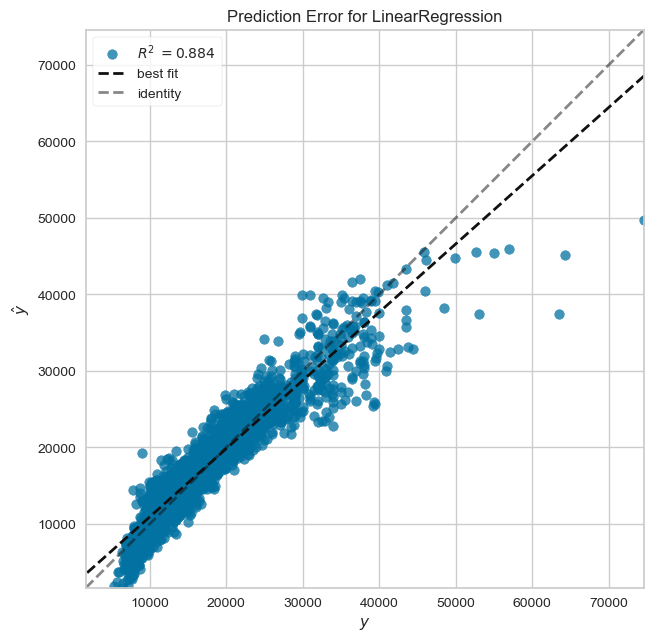

In [60]:
# we will see how our mistakes are distributed
# we will reset our model
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# With the prediciton error visual, we can see how good the predictions made by our model are.
# we train with train data
# we get the test data and scores - we draw the graphs

# Our predictions are on the y-axis and our actual values are on the x-axis.
# The gray identity line is the points where the model's predictions are perfect,
# The dark line represents the best fit line drawn by our model after training.
# The closer the dark line and the fainter line are, the better the model's predictions.
# In the identity line, the average of the difference between y values and predicted y values is equal to zero
# This means that the residuals are 0 and the R2 value is 1.

# When we look at the image, we can see that cars priced at 40 thousand EURO and above pull our best fit line down.
# If I see cars worth 40 thousand EURO and above that spoil my scores from the data, or if I detect them based on models,
# Can I get better scores if I remove outlier priced cars from my data and retrain the model on this data?

## Residual Plot

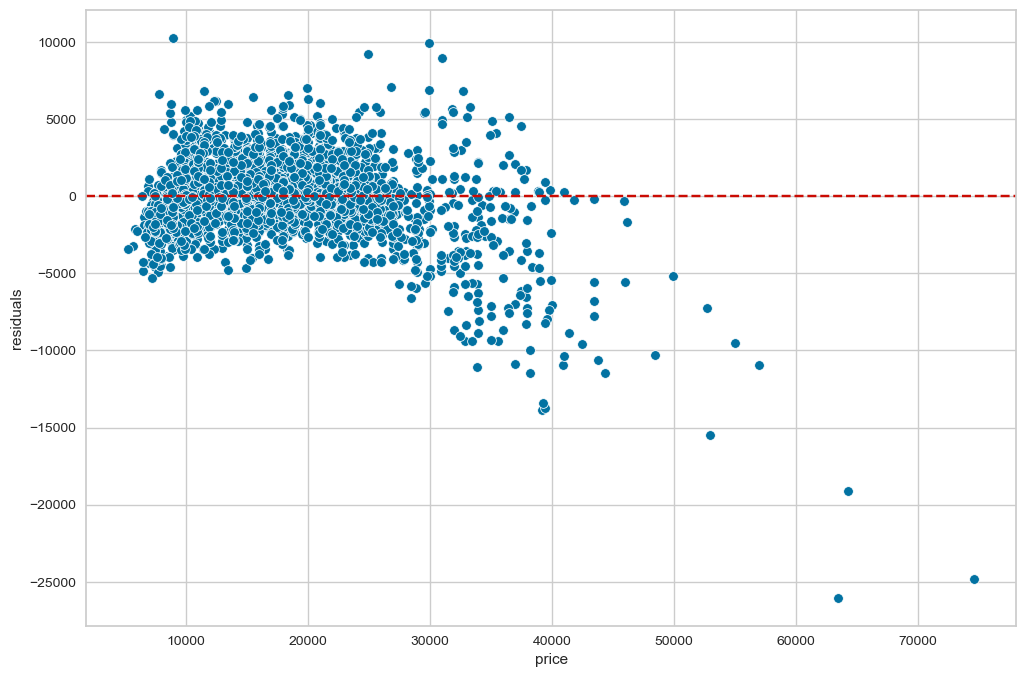

In [61]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# When error terms are calculated as negative values, the values on the y-axis of the graph are made positive.
# This more clearly shows the differences between the magnitudes of the error terms.

# residuals;
# 1- will be distributed approximately equally and randomly on both sides of the axis where the error is 0
# must also not contain patterns
# 2- This distribution will conform to the normal distribution

# if these conditions are met data linear reg. We can say that this is suitable data forijou89nkp0io

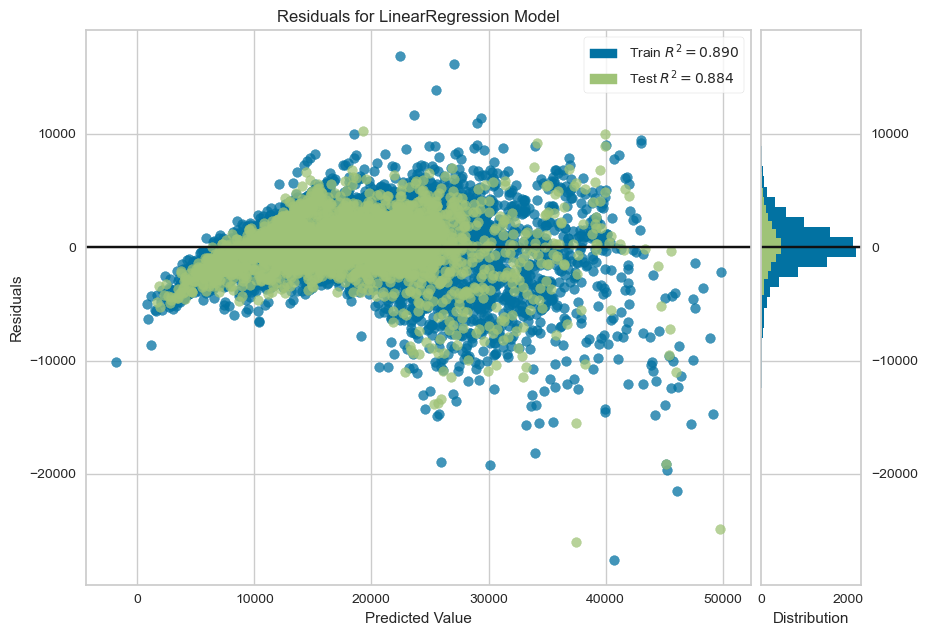

In [62]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

## Dropping observations from the dataset that worsen my predictions

In [63]:
df1 = df[~(df.price>35000)]
df1.head()

# to filter rows (observations) whose price is not greater than 35,000
# The tilde (~) operator is used to invert a logical value.

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [64]:
len(df[df.price>35000])

473

In [65]:
df0[df0.price>35000].groupby("make_model").count().iloc[:,0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [66]:
df0.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [67]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [68]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

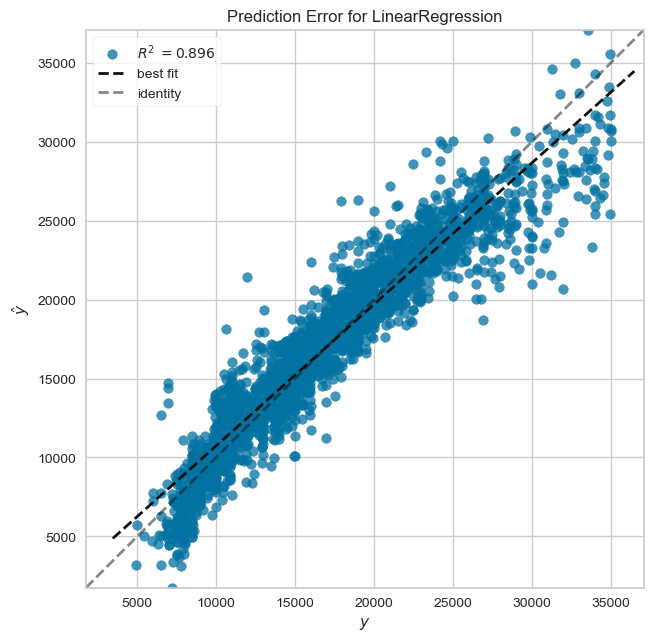

In [69]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [70]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


In [71]:
1894/df1.price.mean()

# Our average prediction error before discarding outliers decreased from 13.81% to 10.93%.
# There was an improvement of approximately 2.88% in our forecasts.

0.1093750965362424

In [72]:
2501/df.price.mean()

0.13817480842212715

In [73]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [74]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [75]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
5426,24200,22763.621,1436.379
4254,18750,17222.443,1527.557
9396,8980,8281.010,698.990
6308,8980,9234.885,-254.885
12651,30450,29745.796,704.204
15212,19950,22011.188,-2061.188
4057,19650,20191.277,-541.277
11868,22990,23360.365,-370.365
9129,8600,10830.595,-2230.595
4037,18500,18905.120,-405.120


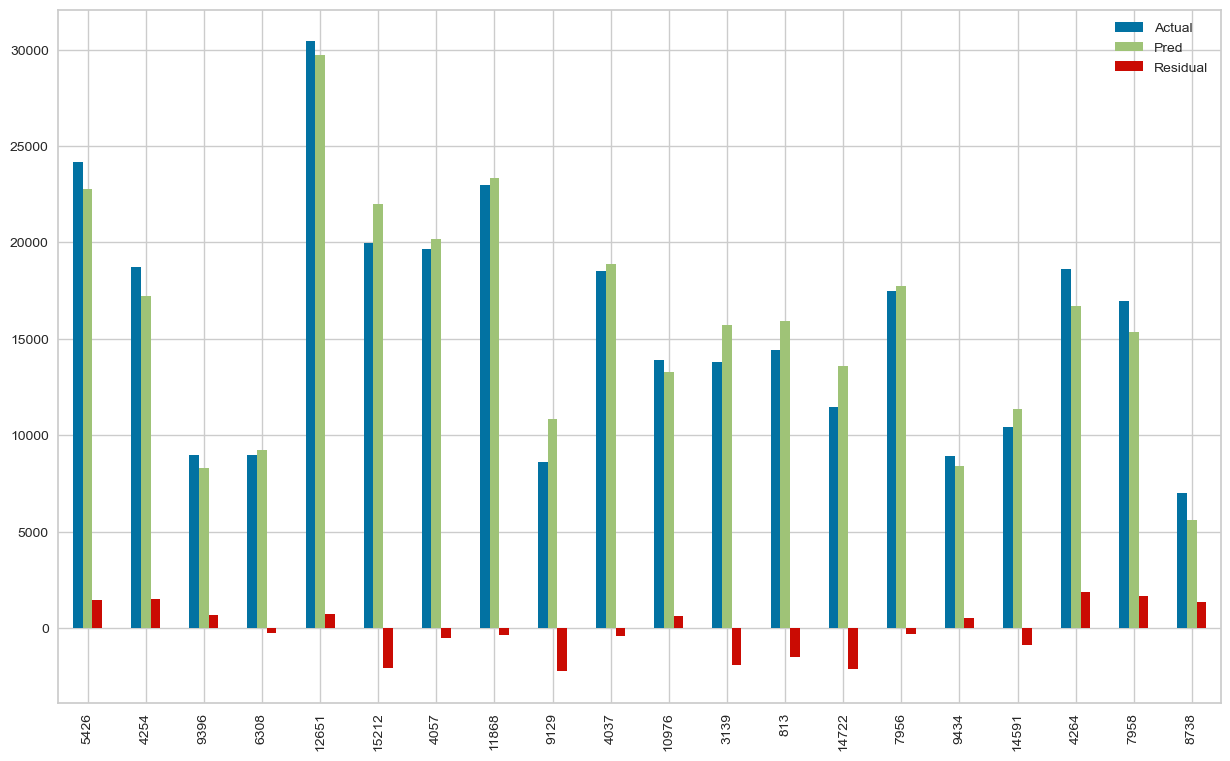

In [76]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

- A positive coefficient indicates that the target variable will increase as the relevant input feature increases.

- A negative coefficient indicates that the target variable will decrease as the relevant input feature increases.

- The greater the absolute value of the coefficient, the greater the effect of the relevant input feature on the target variable.

- If the coefficient is close to zero, it means that the relevant input feature has a weak or non-existent effect on the target variable.

In [77]:
# We will use coefficients to see the effect of features on prediction and for feature selection.
# The order of the coefficients is the same as the feature order of the X_train data we give to the model for training.

pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9447.389
make_model_Renault Clio,-5424.873
make_model_Opel Corsa,-5245.299
make_model_Opel Astra,-3372.469
Drive_chain_rear,-2859.199
Type_Employee's car,-2090.024
Type_Used,-1975.265
ex_Sliding door,-1618.279
Gearing_Type_Manual,-1581.537
age,-1445.872


- A positive coefficient indicates that the target variable will increase as the relevant input feature increases.

- A negative coefficient indicates that the target variable will decrease as the relevant input feature increases.

- The greater the absolute value of the coefficient, the greater the effect of the relevant input feature on the target variable.

- If the coefficient is close to zero, it means that the relevant input feature has a weak or non-existent effect on the target variable.

## Pipeline

**What is Pipeline?**

The pipeline concept is used to manage data processing and machine learning processes efficiently and error-free:

A Pipeline is a tool that allows data preprocessing and modeling steps to be run by sequencing them in a single flow. A Pipeline in the Scikit-learn library combines data transformation operations and an estimator.

**Benefits of Using Pipeline**

1. **Code Readability and Cleanliness**: It facilitates the readability and maintenance of the code by gathering all processing steps in a single structure.

2. **Preventing Data Leakage**: Prevents information leakage about future data, especially if data preprocessing steps are performed before model training. The pipeline structure performs these operations separately for each training subset, thus reducing the risk of data leakage.

3. **Ease of HyperParameter Tuning**: During cross-validation and hyperparameter tuning processes, you can set and manage the parameters of all steps in the pipeline from a single place.

**Steps for Creating and Using Pipeline**

1. **Defining Processing Steps**: First, you determine the transformation steps (e.g. scaling, categorical data transformation) you will perform on your data.

2. **Creating a Pipeline**: You create a pipeline object containing the processing steps and prediction model you selected.

3. **Pipeline Training**: You train all the transformation steps and the model by "fitting" the pipeline on the training data set.

**Summary**

Using Pipeline makes data science and machine learning workflows more efficient and reliable. By ensuring that each step is applied in the correct order and only on the training data, it prevents data leakage and increases the generalization ability of the model. It also simplifies the model selection and parameter tuning process and reduces errors.

In [78]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

# Here, we define `MinMaxScaler` to scale the data and `LinearRegression` steps to model it.
# Each step is a pair of (name, converter/estimator).

In [79]:
pipe_model = Pipeline(steps=operations)

#We create a pipeline with the steps we define.

In [80]:
pipe_model.fit(X_train, y_train)
 
# Using the fit method, we take the data transformation steps and train the model.
# This first scales our data with MinMaxScaler and then on the scaled data
# Trains the LinearRegression model.

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [81]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


# Implement Ridge Regression

**Why and When Do I Use Ridge-Lasso**
                                          
Ridge and Lasso regressions are regularization versions of linear regression. This regularization makes the model more resistant to overfitting and can sometimes improve the overall performance of the model.

1. **Preventing Overfitting**:
    - **Ridge (L2 Regularization)**: Adds the sum of squares of the coefficients as a penalty to reduce the coefficients of the model. This prevents overfitting by reducing the complexity of the model.
    - **Lasso (L1 Regularization)**: Adds the sum of the absolute values of the coefficients as a penalty to compress the coefficients of the model towards zero. This performs feature engineering by setting some coefficients completely to zero, reducing the complexity of the model.

2. **Feature Selection**:
    - Lasso regression can remove ineffective features from the model by reducing some coefficients completely to zero. This is also called feature selection and is very useful in high-dimensional datasets.

3. **Multicollinarity**:
    - If there is high correlation (multicollinarity) between features in a data set, this can destabilize the coefficients of linear regression. Ridge and Lasso can stabilize the coefficients in such cases.

4. **Model Interpretability**:
    - Lasso can increase the interpretability of the model by including only the most important features in the model. Ridge also makes the effects of the features in the model more understandable by reducing the coefficients.

- In conclusion, Ridge and Lasso regressions can help us overcome some of the limitations of linear regression and create more generalizable, more stable models.

-Which method to use depends on the data set, the problem definition, and especially how flexible you want the model to be.

- There are also approaches such as **Elastic Net** to find a balance between these two Regularization techniques.

**L2 Regularization (Ridge Regularization)**

**Purpose:** To prevent model complexity and overfitting.

**Method:** Reduces the weights by penalizing the sum of squares of the model coefficients.

**Result:** The coefficients approach zero but are not zero. All variables in the model are retained.

**Usage:** It is preferred when we want each feature to be included in the model.

**Penalization:** The sum of squares of the coefficients scaled by λ (labmda- regularization parameter) is added to the error function of the model.

**L1 Regularization (Lasso Regularization)**

**Purpose:** To prevent overfitting of the model and to perform feature selection.

**Method:** Reduces some weights entirely to zero by penalizing the sum of the absolute values of the model coefficients.

**Result:** The coefficients of unimportant features are reset, thus automatic feature selection is performed.

**Usage:** It is preferred when we think that a small number of features are effective in the model.

**Penalization:** The sum of the absolute values of the coefficients scaled by λ is added to the error function of the model.

- Both regularization methods use the λ parameter; the larger this value, the harsher the regulation and the smaller the model weights.

- However, while L2 preserves all the features of the model, L1 selects only the most important features and discards the others.

- Therefore, L1 is considered a useful tool for regularization feature selection, while L2 focuses more on overfitting reduction.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [82]:
# The data we will train in the ridge reg. algorithm must be scaled. This process applies all features to the model.
# By equal weighting, it eliminates the problem of multicolinarity and classifies features as important or unimportant.
# can group

# why do we use MinMax scaling? Because we have features that we fit between 0-1 with #get_dumies

scaler = MinMaxScaler()
scaler.fit(X_train)  # To prevent data leakage, only apply to the train data set.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Scaling the target variable is not necessary for linear regression because the target variable is
It is not used in the calculation.**

## Model

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge_model = Ridge(alpha=1, random_state=42) #default alpha=1 alpha=regularization strength

# alpha reg. is the hyper parameter. As this value increases, the reg applied. its strength increases. To beat overfitting
# this hyper parameter should be increased.

In [85]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [86]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.716,1412.912
mse,3794938.109,3829231.926
rmse,1948.060,1956.842


## Finding best alpha for Ridge

**Purpose of GridSearchCV**

- **Hyperparameter Optimization**: GridSearchCV is used to find the best combinations of hyperparameters to maximize the performance of the machine learning model.

- **Comprehensive Search**: When there is more than one hyperparameter, GridSearchCV tries all possible combinations of hyperparameters and finds the combination that works best.

**Hyperparameter vs. Parameter**

- **Hyperparameter**: These are the parameters that are set before training the model and control the learning process and structure of the model. For example, the tree depth in a tree-based model or the regularization value in a linear model.

- **Parameter**: These are the values that the model learns during the training process and extracts from the data set. For example, coefficients and intercept in a linear regression model.

**How GridSearchCV Works**

1. **Parameter Grid Definition**: A list (parameter grid) of various hyperparameters specified by the user and the values to be tried for these parameters is created.

2. **Search and Evaluation**: GridSearchCV trains the model by trying each combination in this parameter grid and evaluates the performance of the model using cross validation for each combination.

3. **Finding the Best Combination**: Among all combinations, the hyperparameter combination that maximizes the performance of the model is selected.

4. **Training the Final Model**: The final model is trained with the best selected hyperparameters. Therefore, as a result of GridSearchCV, the model is trained with these optimal hyperparameters.

**Summary**

GridSearchCV is a hyperparameter optimization tool used to maximize the performance of a machine learning model. By systematically trying all possible hyperparameter combinations, it determines the combination that gives the best result and trains the final model with this combination. This process is critical to enable the model to make more effective and accurate predictions.

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

# The GridsearchCV(GS) algorithm first requests a space range for the relevant hyperparameter (HP). GS for this
# we determine the space interval we will give. (We give 100 different values equally spaced between 0.01 and 100)

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

These notations are a form of numerical expression known as scientific notation. Scientific notation is used to express especially very large or very small numbers and specifies how to represent a number in terms of powers of 10.

- **9.899e+01:** This expression means multiplying the number 9.899 by 10 to the power +01 (i.e. 1). So \( 9.899 \times 10^1 = 98.99 \).
- **1.000e+02:** This expression means the number 1.000 multiplied by 10 to the power +02 (i.e. 2). So \( 1.000 \times 10^2 = 100.00 \).

Such expressions are commonly used in scientific studies, engineering, and some programming languages. It is preferred to shorten float type numbers in a readable way, especially in the output of computer programs.

In [89]:
ridge_model = Ridge(random_state=42) 

# GridsearchCV also requests the ML algorithm we will use.

In [90]:
param_grid = {"alpha":alpha_space}

# We write hyperparameter spaces in a dictionary with the hyperparameter (HP) names used in the ML algorithm.
# We define the space against HP as a list or array.
# Note that the alpha_space variable we defined here against alpha is a 100-item array.

In [91]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

# According to which metric we want the scores of the ridge ML model to be improved, enter the relevant information against scoring.
# We write our metric. We can write a single metric. The default value is R2_score.

# GridsearcCV is calculated separately for all values in the hyperparameter space to maximize the metric we want.
# takes scores from different regions of the data (according to the number we specify in the CV) and calculates their average.
# Returns the hyperparameter value(s) with the highest average.

# default CV number is 5.

# Since GrdiseachCV also performs Cross Validation, it can be used to obtain validation and train set scores.
# We specify return_train_score=True. (scoring only returns the metric score we wrote in front of it)

In [92]:
ridge_grid_model.fit(X_train_scaled,y_train) 

# Since we gave cv = 10, training is carried out in 10 different regions of the data for each alpha value.

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [93]:
ridge_grid_model.best_params_

# After his training, it found 1.02 as the best value.

{'alpha': 1.02}

In [94]:
ridge_grid_model.best_estimator_

# hyper only returns values other than default parameters, if our best alpha value after gridsearch is
# If were 1, it would not show the value 1 here.

# arr = np.linspace(0.01, 100, 100)
# print(1.02 in arr)

Ridge(alpha=1.02, random_state=42)

In [95]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025,0.005,0.001,0.000,0.010,{'alpha': 0.01},-1978.044,-1937.280,-1904.261,-1955.055,-1906.690,-2060.461,-2055.468,-1998.684,-2069.129,-1949.457,-1981.453,59.107,2
1,0.025,0.004,0.000,0.000,1.020,{'alpha': 1.02},-1972.226,-1938.831,-1906.079,-1958.467,-1906.059,-2058.752,-2056.446,-1998.056,-2066.640,-1947.015,-1980.857,58.403,1
2,0.020,0.004,0.001,0.000,2.030,{'alpha': 2.03},-1969.822,-1941.251,-1908.777,-1961.840,-1906.768,-2059.557,-2058.102,-1998.319,-2065.378,-1946.208,-1981.602,57.915,3
3,0.026,0.005,0.001,0.001,3.040,{'alpha': 3.04},-1969.348,-1944.208,-1911.925,-1965.138,-1908.255,-2061.121,-2060.132,-1999.156,-2064.876,-1946.351,-1983.051,57.453,4
4,0.021,0.003,0.001,0.000,4.050,{'alpha': 4.05},-1970.051,-1947.502,-1915.303,-1968.368,-1910.222,-2063.062,-2062.377,-2000.381,-2064.899,-1947.097,-1984.926,57.003,5
5,0.020,0.006,0.000,0.000,5.060,{'alpha': 5.06},-1971.508,-1951.005,-1918.792,-1971.537,-1912.497,-2065.218,-2064.748,-2001.877,-2065.300,-1948.246,-1987.073,56.564,6
6,0.020,0.007,0.000,0.000,6.070,{'alpha': 6.07},-1973.465,-1954.635,-1922.322,-1974.651,-1914.972,-2067.500,-2067.190,-2003.566,-2065.985,-1949.677,-1989.396,56.137,7
7,0.025,0.006,0.001,0.000,7.080,{'alpha': 7.08},-1975.759,-1958.335,-1925.853,-1977.713,-1917.577,-2069.857,-2069.668,-2005.395,-2066.885,-1951.311,-1991.835,55.724,8
8,0.025,0.007,0.001,0.000,8.090,{'alpha': 8.09},-1978.283,-1962.068,-1929.359,-1980.728,-1920.267,-2072.254,-2072.162,-2007.325,-2067.952,-1953.094,-1994.349,55.326,9
9,0.024,0.004,0.001,0.000,9.100,{'alpha': 9.1},-1980.964,-1965.807,-1932.826,-1983.697,-1923.009,-2074.667,-2074.658,-2009.329,-2069.150,-1954.989,-1996.910,54.941,10


In [96]:
ridge_grid_model.best_index_

# returns the df index where the best score was obtained.

1

In [97]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.712,1412.875
mse,3795015.419,3829086.131
rmse,1948.080,1956.805


In [98]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [99]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

# 'GridSearchCV' object has no attribute 'coef_'
# Since grid models do not have a coef_ feature, they are created manually according to the best hyperparameter we found after grdisearch.
# we rebuild and train the model and obtain the coef_s.

,Coef
km,-11101.861
make_model_Renault Duster,-8384.639
make_model_Renault Clio,-5409.447
make_model_Opel Corsa,-5295.138
age,-4382.308
make_model_Opel Astra,-3334.959
Displacement_cc,-2271.755
Type_Employee's car,-2076.174
Type_Used,-1967.430
Drive_chain_rear,-1817.244


# Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Model

In [100]:
from sklearn.linear_model import Lasso

In [101]:
lasso_model = Lasso(random_state=42, alpha=1)

# Lasso model also requires the data to be given in scaled form. This process applies to all features by the model.
# By equal weighting, it solves the multicolinarity problem and allows us to perform feature selection.

In [102]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [103]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.170,1409.010
mse,3806483.613,3814782.540
rmse,1951.021,1953.147


## Finding best alpha for Lasso

In [104]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [105]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [106]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [107]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [108]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [109]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11128.712
make_model_Renault Duster,-7501.018
make_model_Renault Clio,-5364.928
make_model_Opel Corsa,-5287.867
age,-4382.958
make_model_Opel Astra,-3332.248
Type_Employee's car,-1985.696
Displacement_cc,-1960.999
Type_Used,-1890.448
Gearing_Type_Manual,-1619.269


# Implement Elastic-Net

It is a combination of Ridge Regression and Lasso techniques.

It has two separate regularization parameters to determine the strength of the regularization terms and thus a balance can be found between Ridge Regression and Lasso.

When l1_ratio=1 is selected as the hyperparameter, it behaves like Lasso, and when l1_ratio=0 is selected, it behaves like Ridge. Generally, Lasso is inclined.

**Situations Where Elastic-Net Will Be Used:**

Elastic-Net is often useful when many features have high correlation with each other and at the same time you want some features to be discarded completely.

If you need feature selection but also want to manage high correlation between features, Elastic-Net meets this kind of balance need.

**Advantages of Elastic-Net:**

1. **Feature Selection and Regularization**: Elastic-Net combines the feature selection capability of Lasso and the regularization applied to model coefficients by Ridge. This is useful when you want to both perform feature selection and edit coefficients.

2. **Multicollinearity**: In data sets with highly correlated features, Lasso can randomly select a feature. Elastic-Net can alleviate this problem by co-opting such feature groups.

3. **High Dimensional Data**: In cases where the number of features is more than the number of observations, Elastic-Net provides the stability of Ridge while maintaining the advantages of Lasso.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Model

In [110]:
from sklearn.linear_model import ElasticNet

In [111]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [112]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.584,0.592
mae,3099.732,3053.445
mse,15472875.539,15016869.532
rmse,3933.558,3875.161


## Finding best alpha and l1_ratio for ElasticNet

In [113]:
elastic_model = ElasticNet(random_state=42)

In [114]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

**alpha**:
    - This parameter controls the overall regularization severity.
    - When alpha = 0, ElasticNet does no editing.
    - As the alpha value increases, the severity of the regulation increases. This may help the model be more resistant to overfitting.

**l1_ratio**:
    - This parameter controls the mixing between L1 (Lasso) and L2 (Ridge) regulation.
    - When l1_ratio = 1, this means completely L1 (i.e. only Lasso).
    - When l1_ratio = 0, this means completely L2 (i.e. Ridge only).
    - When 0 < l1_ratio < 1 you get a combination of both L1 and L2 arrangements.
    - For example, if l1_ratio = 0.5, it means that L1 and L2 arrangements are used equally.

In [115]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [116]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [117]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [118]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importance

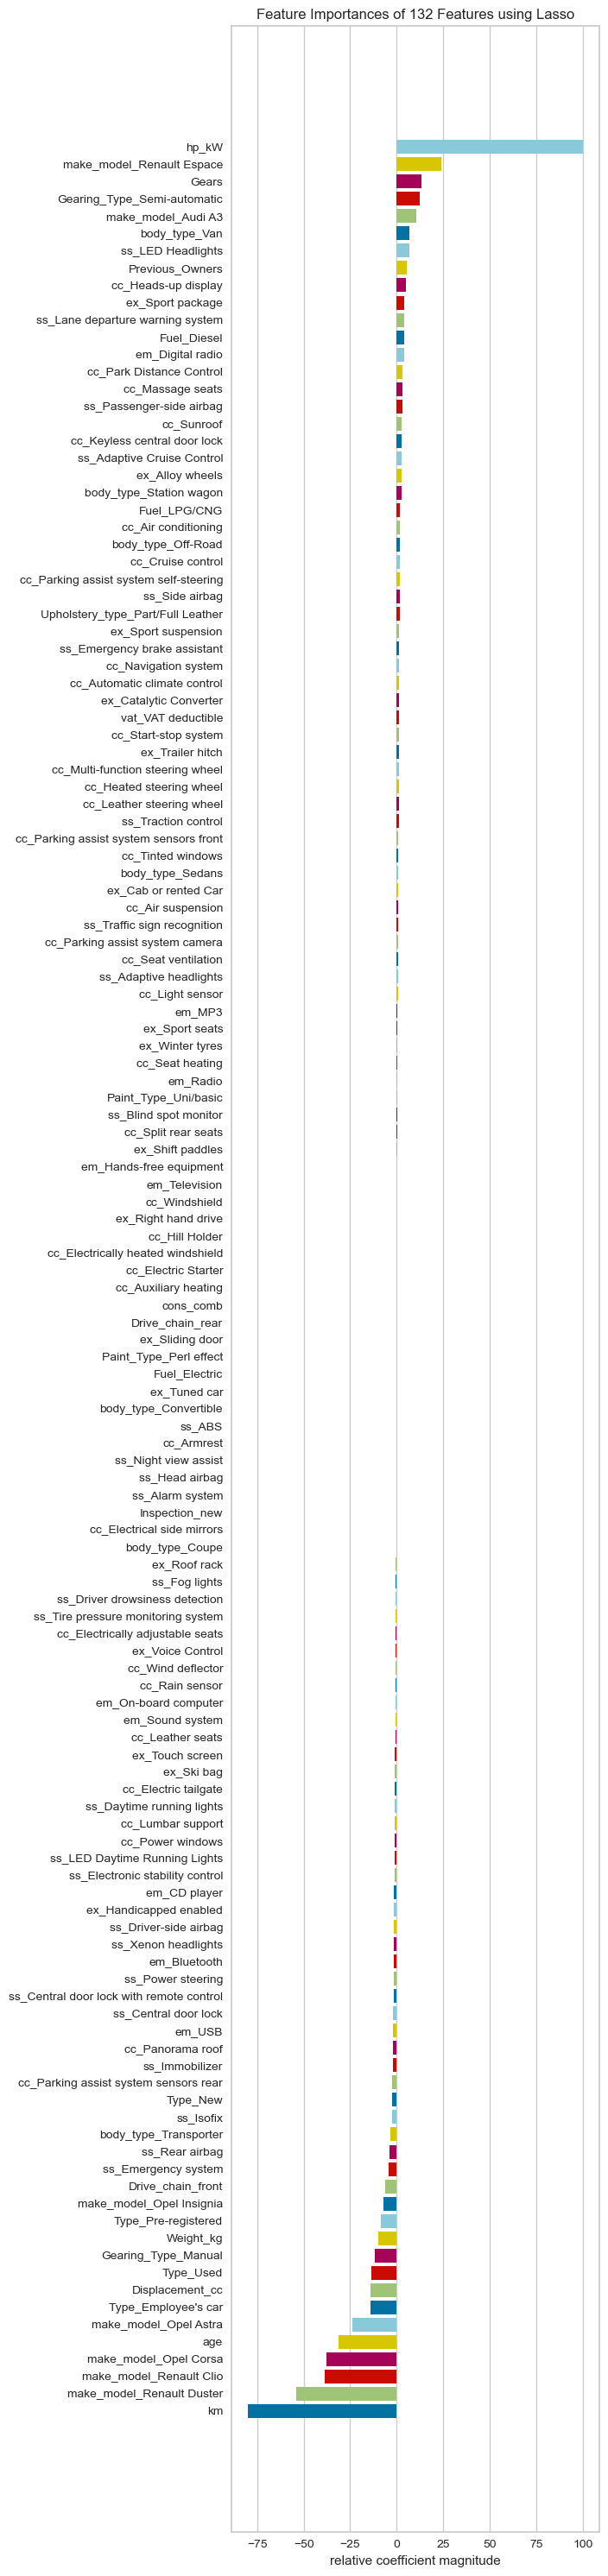

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [119]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

# feature selection yapacağımızdan lasso modeli kullanmamız gerektiğini unutmuyoruz.

In [120]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# We choose the 5 features that have the most impact on forecasting.
# You may have a question like why the make_model feature was chosen here. When you look at the image above
# Among the features that have the most impact on prediction, make_model feature has a unique categorical
# Since we saw that there were observations (Audi A3, AudiA1, Renault Espace etc.), we also chose make_model featuran.

In [121]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [122]:
# we repeat the steps above

df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [123]:
df_new.drop(index=[2614], inplace=True)

In [124]:
df_new = df_new[~(df_new.price > 35000)]

In [125]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,True,False,False


In [126]:
len(df_new)

15419

In [127]:
# According to our new 6-feature data set, we determine our X and Y and rebuild the model.

X = df_new.drop(columns=["price"])
y = df_new.price

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [129]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [131]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [132]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [133]:
lasso_final_model.best_score_

-2239.588352950935

In [134]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [135]:
2132 / df_new.price.mean()

0.1233209499596912

In [136]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [137]:
# We assign the metrics we obtain from all models to the scores variable. Then the model names
# In the index, we transpose the df so that the metrics appear in the featurs.

scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "final_m": {
        "r2_score": fm_R2,
        "mae": fm_mae,
        "rmse": fm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.896,1415.381,1959.649
ridge_m,0.896,1412.875,1956.805
lasso_m,0.896,1408.956,1953.144
elastic_m,0.896,1408.956,1953.144
final_m,0.877,1553.998,2132.539


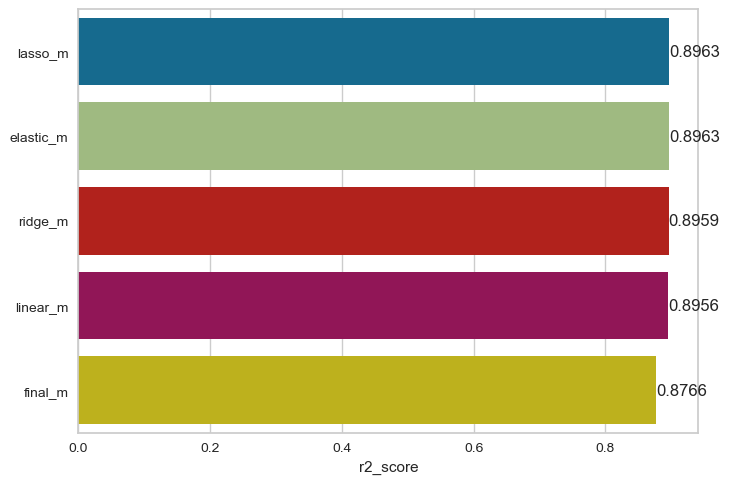

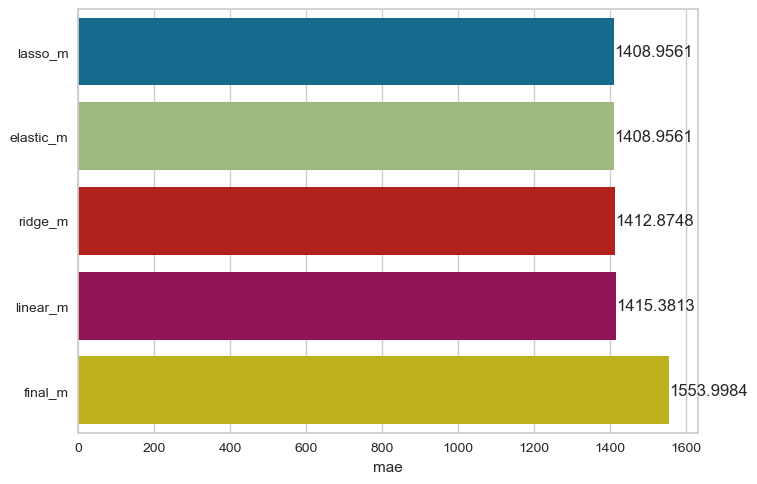

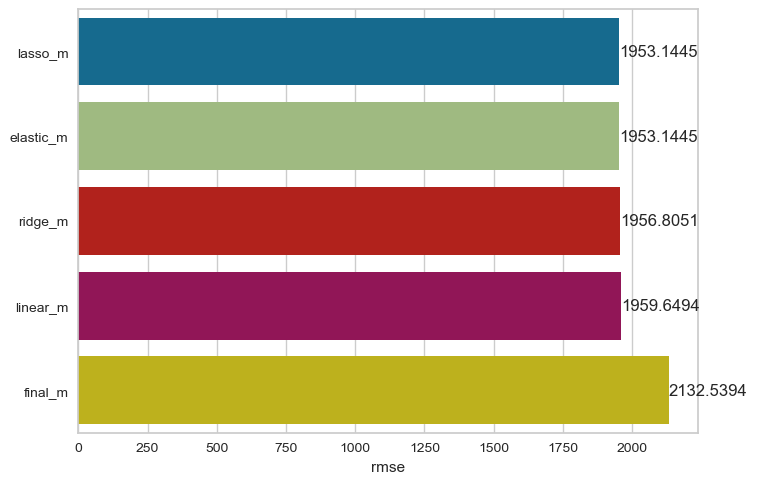

In [138]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score, the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse, the barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

# Prediction

## Prediction with new observation

In [139]:
# Please note that we do not distinguish between train and test sets in the last stage.

final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [140]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [141]:
final_model.fit(X_scaled, y)

/Users/sercanhalat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.023e+07, tolerance: 5.044e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sercanhalat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+08, tolerance: 5.309e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sercanhalat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [142]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [143]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [144]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [145]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,True,True


In [146]:
X.head(1)

# The feature rank of the observation we will predict must be the same as the feature rank of the data we train on.

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,True,False,False,False,False,False,False,False,True,False,False


In [147]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,True,0,0,0,0,0,0,True,0,0


In [148]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [149]:
final_model.predict(my_dict)

array([19559.29001107])

## Prediction with random samples

In [150]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [151]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [152]:
final_model.fit(X_scaled, y)

/Users/sercanhalat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.301e+07, tolerance: 5.656e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sercanhalat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.023e+07, tolerance: 5.044e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sercanhalat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [153]:
final_model.best_estimator_

Lasso(alpha=0.01)

**Lasso(alpha=0.01) ?**

**alpha** controls the regularization severity of the Lasso regression. Regularization is used to reduce the overfitting tendency of the model.

- If the alpha value is close to 0 (for example 0.01), Lasso regularization decreases and the model resembles linear regression.
- If the alpha value is large, Lasso regularization increases and more feature coefficients become equal to zero, causing the model to become simpler.

In summary, it means that the model provides some protection against overfitting, but still allows the model to use most features.

In [154]:
random_samples = df_new.sample(n=20)

In [155]:
X_random = random_samples.drop(columns=["price"])

In [156]:
X_random = final_scaler.transform(X_random)

In [157]:
predictions = final_model.predict(X_random)
predictions

array([15463.74117052,  4730.86178079, 10212.09791555, 18063.93340198,
       29381.63621583, 18366.95757834, 20528.40317688, 20386.64477773,
       13040.25639639, 28869.51030536, 10863.73299215, 19441.59458449,
       17229.39365353, 16403.30234589, 14709.047104  , 21512.62332167,
       23070.92705798, 15648.37704897, 10101.12308619,  8210.41123359])

In [158]:
true_labels = random_samples["price"].values
true_labels

array([14990,  7500,  9800, 19400, 29990, 16975, 25845, 21490, 17695,
       29181,  9290, 11490, 16210, 17105, 15030, 23130, 27450, 10990,
       10900,  7900])

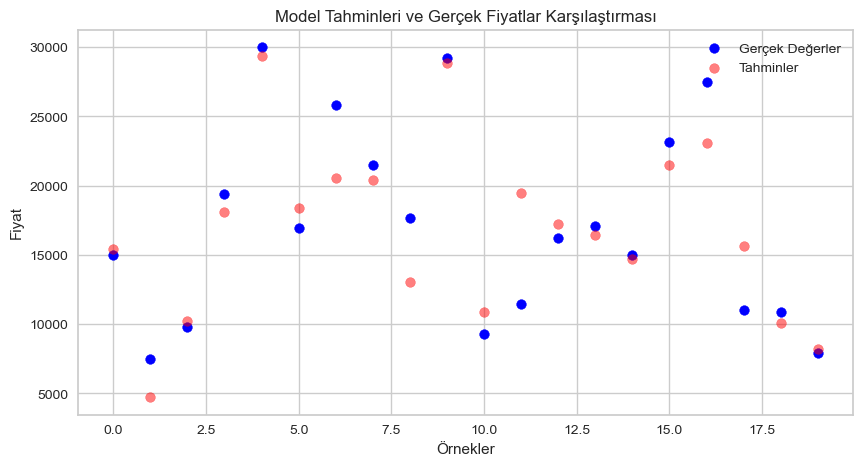

In [159]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='Gerçek Değerler')
plt.scatter(range(len(predictions)), predictions, color='red', label='Tahminler', alpha=0.5)
plt.title('Model Tahminleri ve Gerçek Fiyatlar Karşılaştırması')
plt.xlabel('Örnekler')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

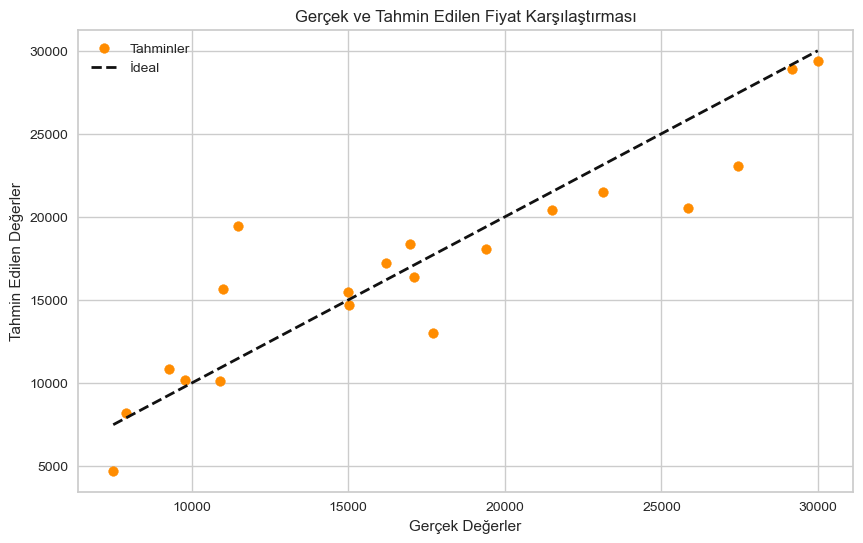

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='Tahminler')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='İdeal')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Fiyat Karşılaştırması')
plt.legend()
plt.show()

# <p style="background-color:ORANGE;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>THE END</b></p>
